### Main objective of the analysis 

The analysis will be focused on practical examples of sequential neural networks using the library Keras for a multiclass, classification problem

The dataset is based on determining whether a fetus is healthy or not, based on 21 different features. The data are humanly labeled with 3 possible outcomes (Healthy, Suspicious, Non-Healthy).
Based on this supervised dataset, I will create different model variations and compare the accuracies between them. The objective is double:

- To find out whether the increase in accuracy that Dense Neural Networks provide is worth the increased computational cost. In order to have a baseline against which to compare, I will create a "traditional" classifier using Random Forest.
- To understand the importance of the hyperparameters used, i.e. which one is more influential when trying to predict.

### Brief description of the data set, its attribute and outline of objectives

#### Description of the dataset and its attributes

The dataset I'm using is from Kaggle, a public dataset bank (https://www.kaggle.com/), and it is focused around determining if a fetus is healthy or not.

It contains 21 features about the status of the fetus. The following description comes from the dataset itself:

1. baseline value: Baseline Fetal Heart Rate (FHR)
2. accelerations: Number of accelerations per second
3. fetal_movement: Number of fetal movements per second
4. uterine_contractions: Number of uterine contractions per second
5. light_decelerations: Number of LDs per second
6. severe_decelerations: Number of SDs per second
7. prolongued_decelerations: Number of PDs per second
8. abnormal_short_term_variability: Percentage of time with abnormal short term variability
9. mean_value_of_short_term_variability: Mean value of short term variability
10. percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability
11. mean_value_of_short_term_variability: Mean value of short term variability
12. histogram_width: Width of the histogram made using all values from a record
13. histogram_min: Histogram minimum value
14. histogram_max: Histogram maximum value
15. histogram_number_of_peaks: Number of peaks in the exam histogram
16. histogram_number_of_zeroes: Number of zeroes in the exam histogram
17. histogram_mode: Hist mode
18. histogram_mean: Hist mean
19. histogram_median: Hist Median
20. histogram_variance :Hist variance
21. histogram_tendency: Histogram trend

And finally we have our outcome variable, which is multiclass as mentioned.

Y. fetal_health: 1 - Normal 2 - Suspect 3 - Pathological

More information can be found on the specific datasheet link --> https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

#### Outline of the project and objectives

The phases of the project will be as follows:

- Creation of a more traditional model (Random Forest Classifier) to use as a baseline and get its accuaracy.
- Creation of three sequential Neural Network models.
- Comparison of the goodness of each model (accuracy) and computational cost.

To begin, I will import the necessary libraries as well as the dataset we will be working with.
As mentioned, only the column fetal_health is the outcome. So that will be my Y and the rest of the dataframe will be my X (features).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [2]:
allData = pd.read_csv('fetal_health.csv')

y=allData['fetal_health']
X=allData.drop('fetal_health', axis=1)

allData.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


The shape of our dataset is 2126 observations and 22 columns (21 features plus our outcome).


In [3]:
allData.shape

(2126, 22)

### Exploratory Data Analysis

This information is actually available in the dataset website, however I will draw the conclusions in the same way.

We can see that the data are all of type float.

In [4]:
allData.dtypes.value_counts()

float64    22
dtype: int64

There are no empty values at all.

In [5]:
np.unique(allData.isnull().values, return_counts=True)


(array([False]), array([46772], dtype=int64))

The command Describe tells us the following.

- Max-min values depend greatly on the feature, therefore, normalization may be needed down the road.
- As stated before, there are no empty values (count is 2126 for all features).

In [6]:
allData.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Finally, let's ensure that our outcome variable does have the values that we need.
Value Counts are 1655 healthy fetus, 295 suspected  and 176 pathological.
As happens in other health project, typically we will have more normal cases than affected ones. So we will have to take this into account with the success measurement. Basically the implication is that we need to be careful not to take the accuracy as the master parameter, as it does not indicate the reliability of the method alone.

In [7]:
allData['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

I will now import the libraries needed for it (SKLearn and Pandas).
Then I will create subsets (train and test, the test subset being 30% of the full set).

If we inspect the size of the Test batch, we see it's 638 observations (30% of the 2126 initial observations in the dataset).

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_test

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
961,133.0,0.000,0.000,0.007,0.003,0.0,0.0,35.0,1.3,4.0,...,90.0,67.0,157.0,7.0,0.0,139.0,135.0,139.0,16.0,1.0
2096,133.0,0.000,0.000,0.007,0.000,0.0,0.0,75.0,0.4,15.0,...,26.0,129.0,155.0,2.0,0.0,136.0,137.0,139.0,1.0,0.0
870,136.0,0.008,0.000,0.007,0.000,0.0,0.0,42.0,0.7,20.0,...,38.0,120.0,158.0,2.0,1.0,141.0,143.0,144.0,3.0,0.0
792,146.0,0.000,0.000,0.005,0.001,0.0,0.0,55.0,0.7,32.0,...,72.0,93.0,165.0,4.0,0.0,150.0,147.0,150.0,6.0,1.0
351,140.0,0.000,0.019,0.000,0.000,0.0,0.0,77.0,0.2,82.0,...,8.0,136.0,144.0,1.0,0.0,141.0,140.0,142.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,125.0,0.004,0.012,0.005,0.006,0.0,0.0,23.0,2.2,0.0,...,125.0,53.0,178.0,8.0,0.0,143.0,122.0,131.0,92.0,0.0
1270,119.0,0.000,0.000,0.007,0.000,0.0,0.0,27.0,1.2,0.0,...,37.0,109.0,146.0,1.0,0.0,120.0,120.0,121.0,1.0,-1.0
1806,143.0,0.000,0.000,0.001,0.000,0.0,0.0,68.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,144.0,144.0,146.0,1.0,0.0
787,123.0,0.003,0.003,0.000,0.000,0.0,0.0,52.0,0.8,2.0,...,90.0,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0


### Training of at least three variations of NN models

As a first step I will instantiate the RF Classifier and fit to my data. 
Then I will capture the predicted classes and the probability, to be able to calculate the confusion matrix and the reference accuracy and ROC-AUC. This will give us a baseline to start from.

In [9]:
rf_model = RandomForestClassifier(n_estimators=150)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [10]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf,  multi_class='ovr')))

accuracy is 0.940
roc-auc is 0.985


Just to get a visual of this, I will create a function of the truth table for each of the method. It will take two labels and create the heat map for a summary dataframe where I will insert the results of each model:
First I will store the data for this model here:

In [11]:
summary = pd.DataFrame({'gt': y_test, 'pred_RF': y_pred_class_rf})

Now let's define the function, which will receive the two columns to be plotted (first should always be the ground truth and the second, the model to be tested).

In [30]:
def heatMapTwoLayers(columnA, columnB):
    heatMapData = pd.DataFrame({'gt': summary[columnA], 'pred': summary[columnB]})
    heatMapData = heatMapData.value_counts().to_frame('counts').reset_index().pivot('gt', 'pred', 'counts')
    sns.heatmap(heatMapData, cmap="Blues", annot=True, fmt='g')



Now when we plot this, we see that the accuracy is pretty high.
In this case, the items in the diagonal (summing up 600 cases) are the cases got right. Divided by the total cases (638) it gives us the accuracy of 94.2% highlighted above.

It is a pretty high accuracy for a method relatively fast, such as Random Forest Classifiers.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19324\289324659.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatMapData = heatMapData.value_counts().to_frame('counts').reset_index().pivot('gt', 'pred', 'counts')


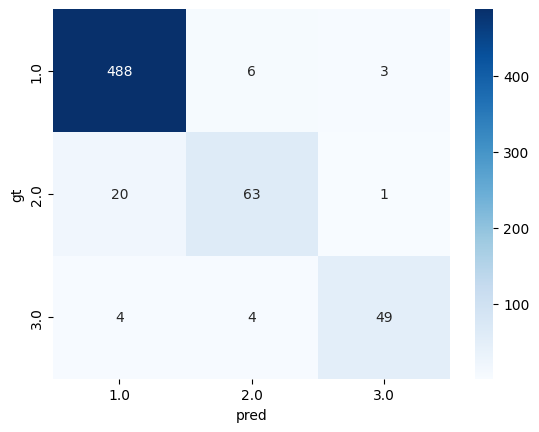

In [31]:
heatMapTwoLayers('gt', 'pred_RF')

So as a result, in the execution of this process we have got an accuracy of 94.2% and a very convenient execution time.
It is time now to see if we can get any further with Neural Networks.

I will import Keras library. 

In [14]:
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

It is advised in the course to perform normalization.
This is because, if we don't normalize the data, those weights with higher numerical value will influence more the loss function and therefore will progress more quickly than the others. So I will do exactly the same here:

In [15]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

On another note, multiclass problems can be solved by Neural Networks but we will need to have one output per value. In other words, we need to one-hot-encode the output. This we can do by Pandas get_dummies method:

In [16]:
y_train_2D = pd.get_dummies(y_train)
y_test_2D = pd.get_dummies(y_test)

And now it's time to configure my NN model.
In all cases I will be running the code to 1000 epochs. I found empirically, starting this assignment, that it was an adequate number of epochs for comparison. I tried 5000 and after 1500 epochs it was bringing little or no value. Therefore 1000 looks like a reasonable guess given the size of this batch.

#### Brief description of the model:

##### General configuration
All models I build will use the same dataset, so generally speaking, they should all have these dimensions:

- Input dimension: 21 (number of features).
- Output dimension: 3 (one for each possible value of the outcome)

Before starting, I will create a function which will take the model history as parameter and plot the loss and accuracy of both train and test subsets.

In [17]:
def plotNNResults(run_hist):
    n = len(run_hist.history["loss"])

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(range(n), (run_hist.history["loss"]),'r.', label="Train Loss")
    ax.plot(range(n), (run_hist.history["val_loss"]),'b.', label="Validation Loss")
    ax.legend()
    ax.set_title('Loss over iterations')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(range(n), (run_hist.history["accuracy"]),'r.', label="Train Acc")
    ax.plot(range(n), (run_hist.history["val_accuracy"]),'b.', label="Validation Acc")
    ax.legend(loc='lower right')
    ax.set_title('Accuracy over iterations')

For the layers configuration, I have chosen Dense as a start because it's the simplest case. From there, we can complexify afterwards.

#### Specific configuration for model 1

Description of the model:
- Only one dense layer with 12 nodes and activation function is sigmoid.
- Iteration based on:
    - Descent function: SGD (Stochastic Gradient Descent)
    - Learning rate: .003
    - Loss function: binary_crossentropy.
- Number of iterations (epochs): 1000.



In [18]:
model_1 = Sequential()
model_1.add(Dense(12,input_shape = (21,),activation = 'sigmoid'))
model_1.add(Dense(3,activation='sigmoid'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                264       
                                                                 
 dense_1 (Dense)             (None, 3)                 39        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


I defined this number of epochs by trial and error. 
Initially set to 200, I increased it to 1000 to have a fair comparison across models.

Note that I have removed the output of the execution of each model, because it resulted in a PDF of more than 190 pages.
If you would like to have the complete version, please let me know.

In [ ]:
model_1.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train_2D, validation_data=(X_test_norm, y_test_2D), epochs=1000)

Let's examine the accuracy of the model. 
Take into account that original values are encoded 1 to 3, whereas the output of the NN model is 0 to 2. 
So if we need to compare both values, we will be adding 1 to the output of the Neural Network, we obtain an accuracy of 88.3% as yielded in the execution of the model.

It's not a great result taking into account that RF predicted with 94% accuracy and less than 0.1 s, whereas NN yielded 88.4% but take more than 110 seconds.

In [20]:
#As predict classes was removed from TF 2.5x on, we need to use Numpy to get the arg max:

y_pred_prob_nn_1 = model_1.predict(X_test_norm)
y_pred_class_nn_1=np.argmax(y_pred_prob_nn_1,axis=1)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1+1)))


20/20 [==============================] - 0s 895us/step
accuracy is 0.876


Let's have a look at the truth table:

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19324\289324659.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatMapData = heatMapData.value_counts().to_frame('counts').reset_index().pivot('gt', 'pred', 'counts')


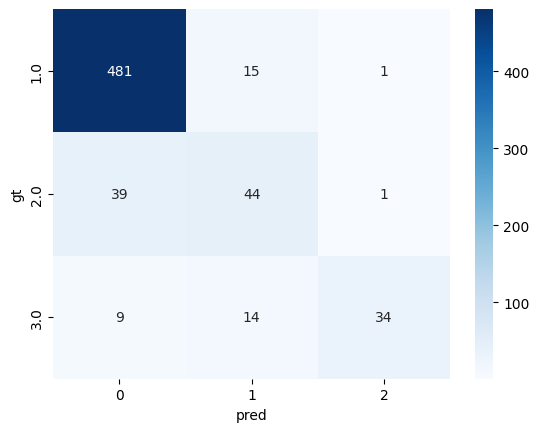

In [32]:
summary['pred_nn1'] = y_pred_class_nn_1
heatMapTwoLayers('gt', 'pred_nn1')

The NN model shows that we very quickly attain 80% of accuracy.
Then it plateaus for approximately 200 iterations, to start improving once again.
Finally, at about 800 iterations the validation accuracy stagnates again.

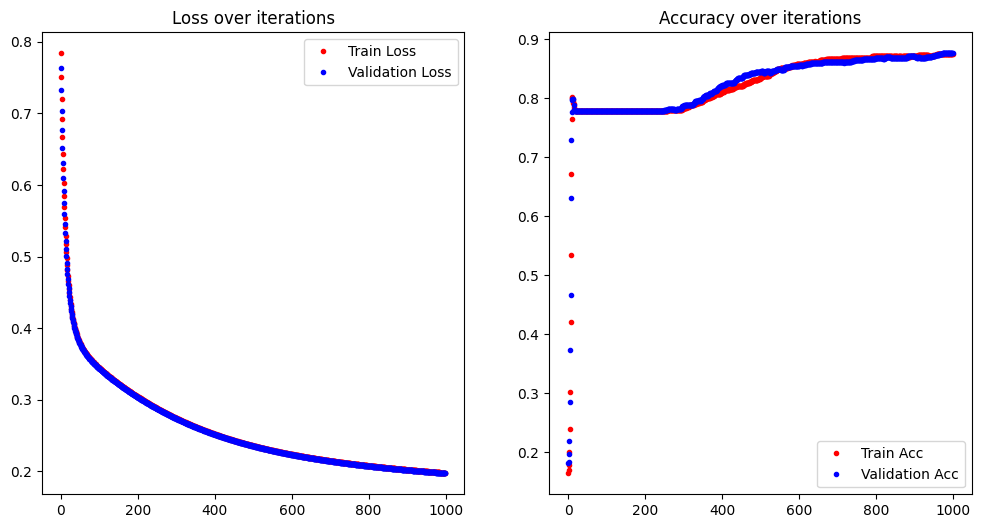

In [22]:
plotNNResults(run_hist_1)

#### Specific configuration for model 2

Description of the model:
- Model 1, plus: 
    - Change the existing dense layer to activation Function ReLU and only 6 nodes.
    - Also, add an extra layer of 6 nodes and activation function ReLU.

In [ ]:

model_2 = Sequential()
model_2.add(Dense(6, input_shape=(21,), activation="relu"))
model_2.add(Dense(6,  activation="relu"))
model_2.add(Dense(3, activation="sigmoid"))

model_2.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train_2D, validation_data=(X_test_norm, y_test_2D), epochs=1000)

This took again 107.3 seconds but the accuracy was improved up to 89.97%.

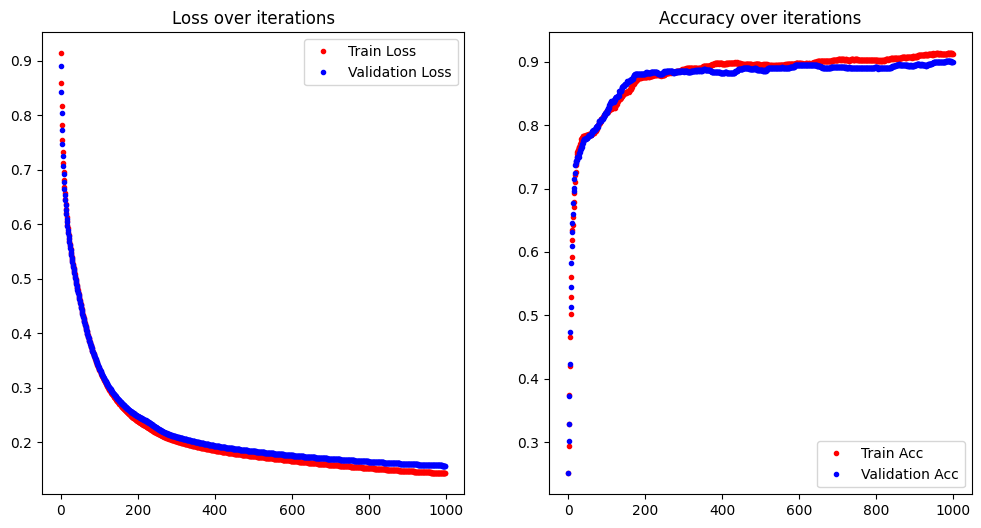

In [24]:
plotNNResults(run_hist_2)

#### Specific configuration for model 3

Description of the model:
- Model 2, plus: 
    - Add three aditional 6-node layers with activation function ReLU.
    - Increase the learning rate to .01.

In [ ]:
### BEGIN SOLUTION
model_3 = Sequential()
model_3.add(Dense(6, input_shape=(21,), activation="relu"))
model_3.add(Dense(6,  activation="relu"))
model_3.add(Dense(6,  activation="relu"))
model_3.add(Dense(6,  activation="relu"))
model_3.add(Dense(3, activation="sigmoid"))

model_3.compile(SGD(learning_rate = .01), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_norm, y_train_2D, validation_data=(X_test_norm, y_test_2D), epochs=1000)

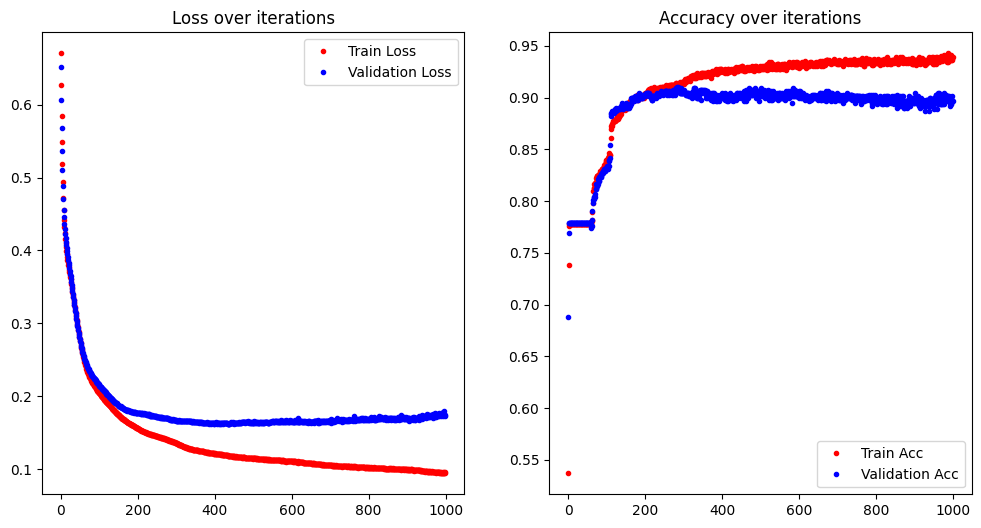

In [27]:
plotNNResults(run_hist_3)

Execution time is 113 seconds and train accuracy hits 93.5%.

However this result is deceptive. We see a clear trend to overfitting:
After 200 iterations, we clearly keep improving our train loss and accuracy, BUT the validation loss and accuracy start to diverge. 
This means that we are starting to reflect the measurement error in the data, rather than it's variance. 

### Summary of all three attempts

Here is a summary of the performance of the three models after 1000 epochs each:

| Model selected                                          | Execution Time (s) | Validation Accuracy in % (after 1000 epochs for NN) | Comments                             |
|---------------------------------------------------------|:------------------:|-----------------------------------------------------|--------------------------------------|
| Baseline model: Random Forest Classifier                | <0.1               | 94.2%                                               |                                      |
| NN Model 1: SGD, LR=0.003, Binary_crossEntropy, Sigmoid | 94.8               | 87.6%                                               |                                      |
| NN Model 2: Change to ReLU and add extra layer          | 107.3              | ~90%                                                |                                      |
| NN Model 3: Add ReLU layer and Increase Learning Rate   | 113                | ~89.7%                                              | Overfit probably due to aggresive LR |

## Which of the Deep Learning models would I recommend as a final model

If we have to choose from the three neural network models shown above, it seems that adding extra layers configured with ReLU activation function was beneficial. This is what we did in model 2.
Therefore it looks like this would be the best option (among the NN models tested)



## Summary Key Findings and Insights

#### Insight #1: Are NN always necessary or better?

The key finding of this experiment is that the baseline model (RF Classifier) outperforms all of the NN experiments in terms of accuracy tested so far.
Moreover it takes very little computational cost, as it takes less than one tenth of a second to compute.

The conclusion that I draw from this analysis is that the need to use Neural Networks depends on the business needs.
- If "normal" accuracies (in the area of 94%) are enough, then RF may serve the purpose as they are fast and they meet the accuracy requirements.
- If we need to get very high accuracies with the data provided, we could maybe keep tuning the neural networks. Model 2, for example, yielded an increase in accuracy when compared to model 1: accuracy increased  90% at the cost of 13 extra seconds computationally. This is still below the bar compared to RF; but it is an increase. However, such kind of tests must be wary with the possibility of overfitting, as is shown in the model 3, where further epochs did not provide extra accuracy.

### Insight #2: Computational cost remains more or less constant throughout the tests.

Surprisingly, throughout all three models we got computational costs with similar orders of magnitude (94.8 ~ 113).
My takeaway is that Neural Network models impose an overall increase in computational cost but, once this is done, increasing the accuracy (by changing the settings) causes marginal increments of the computational time.
So it is relatively possible to test different setups and compare their performances.

### Insight #3: Influence of the Learning Rate in overfitting

In model #3 I increased the learning rate.  I did expect that this would produce a more the chart on test error and accuracy would be more bumpy (as steps are bigger).
But I didn't expect to overfit the data.

If we think about it, increasing it may have accelerated our experiment in a healthy way. We can assume that we got to the same solution as we got in Model 2, but quicker (e.g. in 1000 steps instead of 1000)
What causes the overfitting is, once that point is reached, to keep going on until we hit the 1000 epochs mark. 

The conclusion is that we need to pay attention to a good combination of learning rate and epochs. Elbow will probably come first when LR is increased.

## Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

As key takeaways, I mentioned that maybe the dataset is not complex enough to justify the usage of neural networks.
On the other hand, it is also true that there are plenty of hyperparameters to adjust. Here I changed the number of layers, the activation function and the learning rate in the three models exposed.

Therefore, as next steps I would suggest acting on both:
- Use more complex datasets where simpler methods are not capable of achieving an accuracy of ~95%,
- Test other hyperparameters such as the loss function, which remained constant in my experiment.
